In [343]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [313]:
all_path = '../SLR_dataset/seq_txt/'

In [9]:
root_path = '../SLR_dataset/seq_txt/000000/'

In [11]:
txt_path = os.listdir('../SLR_dataset/seq_txt/000000/')

In [217]:
a = os.path.join(root_path,txt_path[0])

In [219]:
a

'../SLR_dataset/seq_txt/000000/P01_s1_00_0_color.avi'

In [221]:
datalist = []
with open(a, 'r') as file:  # 以读取模式打开文件
    for line in file:       # 逐行读取文件内容
        # 按空格分割每一行，并将每个部分转换为浮点型
        float_values = [float(x) for x in line.split()]
        datalist.append(float_values)  # 将转换后的浮点型列表添加到 datalist

In [223]:
len(datalist)

212

In [81]:
def left_right_hand(data):
    left = data[0:63]
    right = data [63:]
    return left,right

In [151]:
def list_proLR(data):
    #该函数用于将读取到的数据变成左右手格式
    result = []
    for i in data:
        left,right = left_right_hand(i)
        result.append([left,right])
    return result

In [225]:
dataLR = list_proLR(datalist)

In [235]:
def file_statistics_data(data):
    #该函数输入分好左右手的数据，输出每个视频的有效率
    yes_data = 0
    no_data = 0
    for i in data:
        left = i[0]
        right = i[1]
        # print(left,right)
        if (len(set(left)) == 1) and (len(set(right)) == 1):
            no_data+=1
        else:
            yes_data+=1
            
    return yes_data/(yes_data+no_data)

In [233]:
line_statistics_data(dataLR)

0.8018867924528302

In [327]:
def folder_statistics_data(file_path):
    #该函数输入文件夹路径，返回文件夹中每个文件的有效率
    file_list = os.listdir(file_path)
    path_list = [os.path.join(file_path, i) for i in file_list if i.endswith('.avi')]
    all_data = []
    for i in path_list:
        datalist = []
        with open(i, 'r') as file:  # 以读取模式打开文件
            for line in file:       # 逐行读取文件内容
                # 按空格分割每一行，并将每个部分转换为浮点型
                float_values = [float(x) for x in line.split()]
                datalist.append(float_values)  # 将转换后的浮点型列表添加到 datalist
        all_data.append(datalist)
    all_data = [list_proLR(i) for i in all_data]
    statistics_list = [file_statistics_data(i) for i in all_data]
    return statistics_list

In [363]:
def all_data_statistics_data(file_path,model='all'):
    # 该函数输入序列数据集根目录，返回全部数据的有效率
    file_list = os.listdir(file_path)
    folder_list = [os.path.join(file_path,i) for i in file_list]
    all_statistics = [folder_statistics_data(i) for i in folder_list]
    all_statistics = np.array(all_statistics)
    if model != 'all':
        return all_statistics
    else:
        all_statistics = all_statistics.flatten()
        return all_statistics

In [367]:
statistics_result_all = all_data_statistics_data(all_path)

In [368]:
np.savetxt('../trial_sheet/识别有效率统计_all.txt', statistics_result_all, fmt='%f')

In [369]:
statistics_result_group = all_data_statistics_data(all_path,model='no_all')

In [418]:
np.savetxt('../trial_sheet/识别有效率统计_group.txt', statistics_result_all, fmt='%f')

In [375]:
statistics_result_group.shape

(100, 250)

In [399]:
def plt_statistics(data,stride,width=20,height=6):
    bins = np.arange(0, 1+stride, stride)
    hist, bin_edges = np.histogram(data, bins=bins)
    x_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
    # 绘制条形统计图
    plt.figure(figsize=(width,height))
    plt.bar(x_labels, hist, color='skyblue', edgecolor='black')  # 修正：传入 x_labels 和 hist
    plt.xlabel('section')
    plt.ylabel('data bulk')
    # 旋转 x 轴标签，避免重叠
    plt.xticks(rotation=45)
    # 显示图形
    plt.tight_layout()
    plt.show()

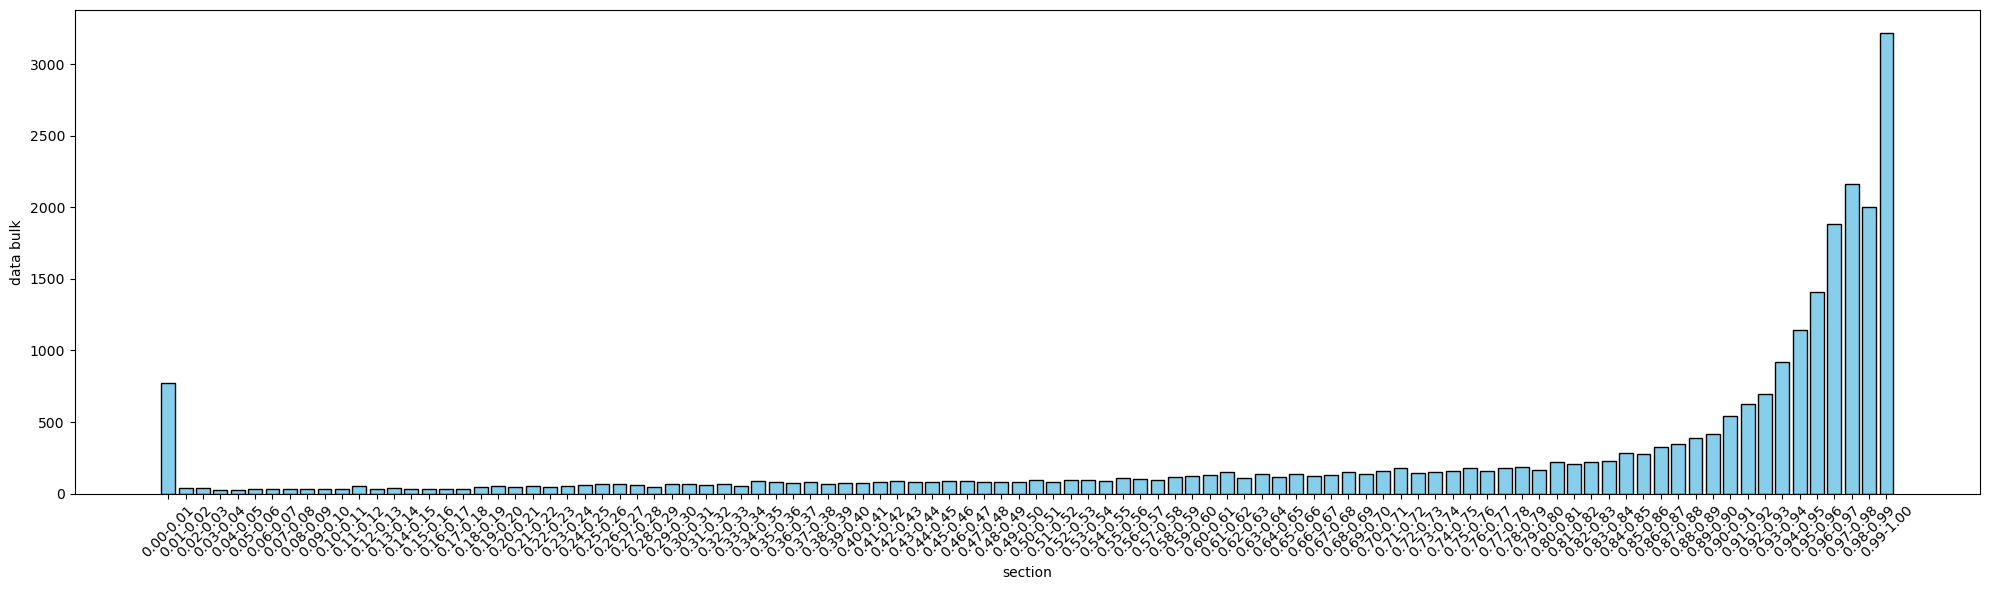

In [401]:
plt_statistics(statistics_result_all,0.01)

In [414]:
def plt_statistics_multiple(data_list, stride, ylabels, width=20, height=6):
    # 创建一个 10x10 的子图布局
    fig, axes = plt.subplots(10, 10, figsize=(width, height))
    fig.tight_layout(pad=3.0)  # 调整子图之间的间距

    # 遍历每个数据和对应的子图
    for i, data in enumerate(data_list):
        # 计算当前子图的行和列索引
        row = i // 10
        col = i % 10

        # 计算直方图
        bins = np.arange(0, 1 + stride, stride)
        hist, bin_edges = np.histogram(data, bins=bins)
        x_labels = [f'{bin_edges[j]:.2f}-{bin_edges[j+1]:.2f}' for j in range(len(bin_edges)-1)]

        # 在当前子图中绘制条形统计图
        axes[row, col].bar(x_labels, hist, color='skyblue', edgecolor='black')
        axes[row, col].set_xlabel('section')
        axes[row, col].set_ylabel(ylabels[i])  # 使用传入的 ylabels 列表
        axes[row, col].tick_params(axis='x', rotation=45)

    # 显示图形
    plt.show()

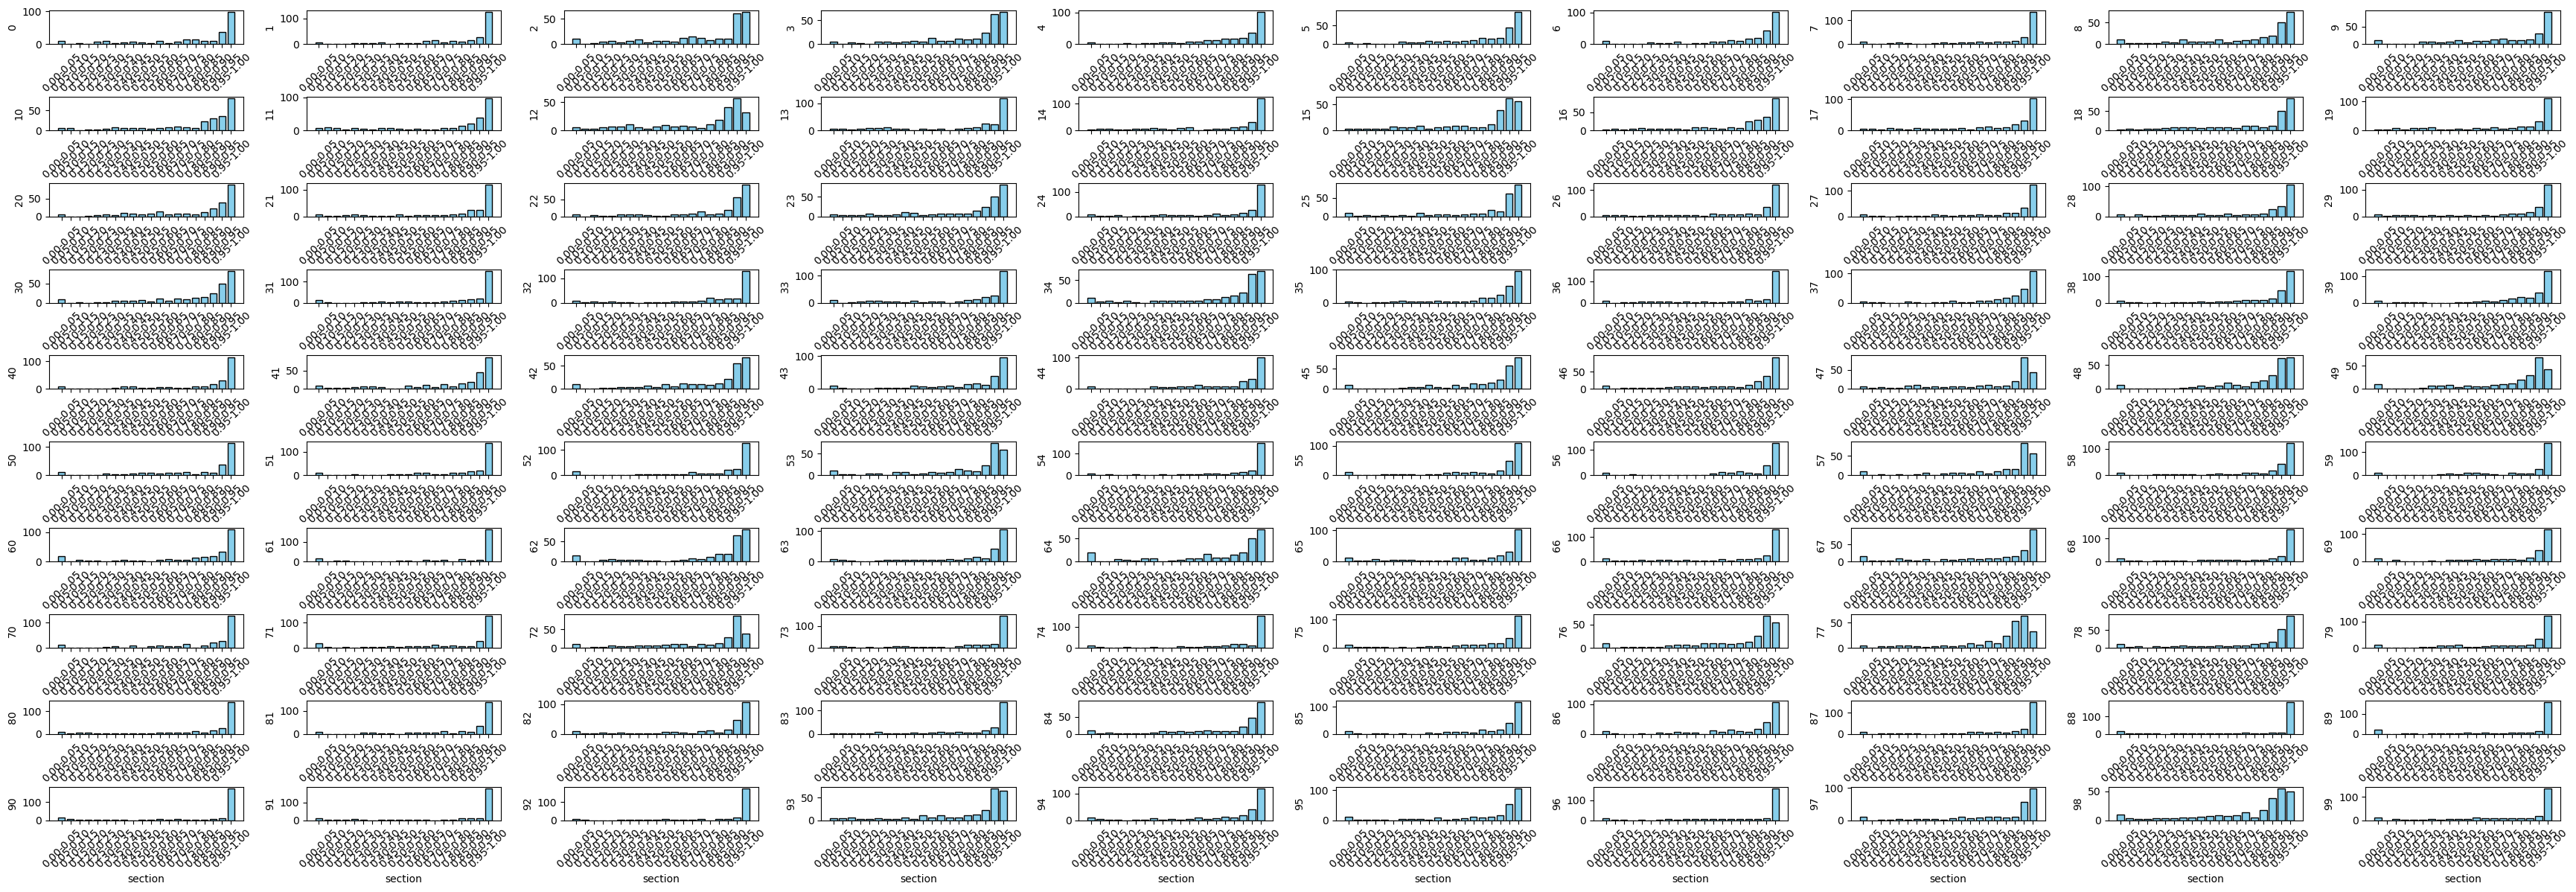

In [428]:
ylabels = [f'{i}' for i in range(100)]
plt_statistics_multiple(statistics_result_group,0.05,ylabels,35,12)

In [430]:
# 稍后数据清洗的时候把0.75以下的过滤掉